# 2주차 - 2024 고등학생 AI경진대회 제1회 제주

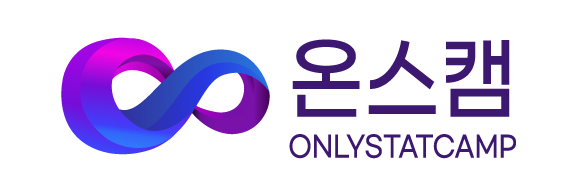

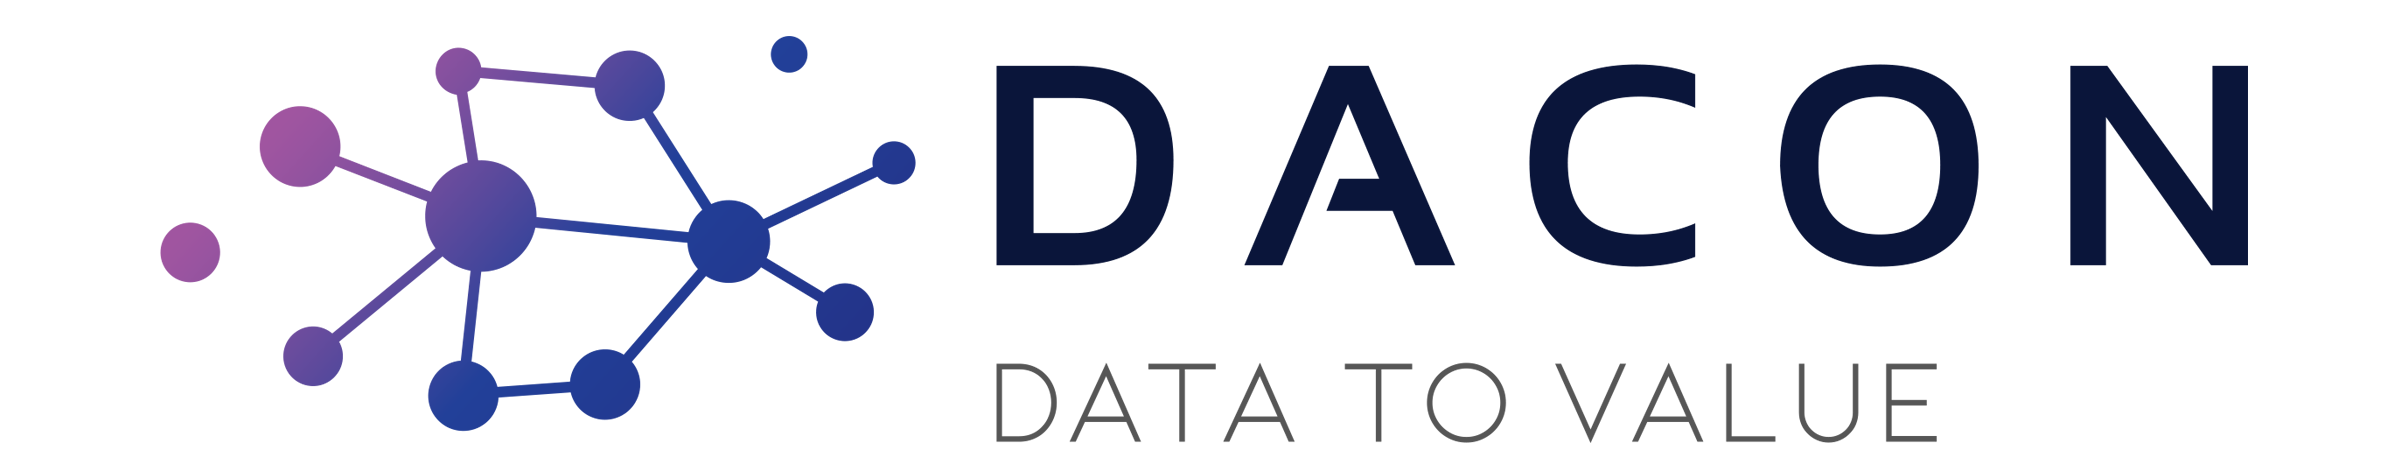

---

In [1]:
import os
import random

In [2]:
import numpy as np
import pandas as pd

In [3]:
from tqdm.auto import tqdm

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [6]:
import tensorflow as tf

2024-01-21 21:31:41.313389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 21:31:42.028137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/juing/app/TensorRT-7.2.3.4/lib:/usr/lib/nvidia:/home/juing/.mujoco/mujoco210/bin:/usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/lib64
2024-01-21 21:31:42.028317: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory

In [7]:
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = "42"

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

---

# 데이터 준비

## 데이터 설명

- train.csv [파일] 
    - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET : 고객의 신용카드 연체 여부
    - 성별
    - 차량 소유 여부
    - 부동산 소유 여부
    - 자녀 수
    - 연간 수입 : 단위 원
    - 수입 유형
    - 최종 학력
    - 결혼 여부
    - 주거 형태
    - 거주지 인구 비율: 고객이 거주하는 지역 인근의 인구 비율 (범위 0~1)
    - 휴대전화 소유 여부
    - 업무용 휴대폰 소유 여부
    - 이메일 소유 여부
    - 직업
    - 가족 구성원 수
    - 산업군 : 고객이 종사하는 직종의 산업군
    - 나이
    - 근속연수
    - 가입연수


- test.csv [파일]
        - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET이 존재하지 않음


- sample_submission.csv [파일] - 제출 양식
    - ID : 신용카드를 보유한 고객의 고유 ID
    - TARGET : 고객의 신용카드 연체 여부를 예측하여 기입

---

## 데이터 불러오기

### train

In [8]:
train_df = pd.read_csv("../data/대금연체여부예측/train.csv")

In [9]:
train_df.head()

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0
3,TRAIN_00003,0,여성,1,0,1,38232000.0,기타,고등학교 졸업,기혼,...,0.004849,1,1,0,Unknown,3.0,산업 4,34,6,12.0
4,TRAIN_00004,0,여성,0,1,0,26550000.0,근로자,고등학교 졸업,기혼,...,0.025164,1,1,0,Unknown,2.0,사업 2,38,0,4.0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  object 
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [11]:
train_df.describe()

,TARGET,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
count,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.107133,0.337517,0.708633,0.412050,3.983699e+07,0.020880,0.999983,0.812033,0.056350,2.155767,44.021183,192.906833,13.271833
std,0.309285,0.472867,0.454396,0.723998,2.472331e+07,0.013850,0.004082,0.390689,0.230598,0.908213,11.852450,388.292796,9.727011
min,0.000000,0.000000,0.000000,0.000000,6.265800e+06,0.000533,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.655000e+07,0.010006,1.000000,1.000000,0.000000,2.000000,34.000000,2.000000,5.000000
50%,0.000000,0.000000,1.000000,0.000000,3.504600e+07,0.018850,1.000000,1.000000,0.000000,2.000000,43.000000,6.000000,12.000000
75%,0.000000,1.000000,1.000000,1.000000,4.779000e+07,0.028663,1.000000,1.000000,0.000000,3.000000,54.000000,16.000000,20.000000
max,1.000000,1.000000,1.000000,19.000000,2.124000e+09,0.072508,1.000000,1.000000,1.000000,20.000000,69.000000,1000.000000,58.000000


In [12]:
train_df.TARGET.value_counts()

0    53572
1     6428
Name: TARGET, dtype: int64

### test

In [13]:
test_df = pd.read_csv("../data/대금연체여부예측/test.csv")

In [14]:
test_df.head()

,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0
3,TEST_00003,여성,0,1,0,31860000.0,연금수령자,고등학교 졸업,기혼,주택 / 아파트,0.014464,1,0,0,Unknown,2.0,기타 1,51,1000,7.0
4,TEST_00004,여성,0,1,2,19116000.0,근로자,고등학교 졸업,기혼,공공분양,0.031329,1,1,0,의료 업계 종사자,4.0,의학,31,10,2.0


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              40000 non-null  object 
 1   성별              40000 non-null  object 
 2   차량 소유 여부        40000 non-null  int64  
 3   부동산 소유 여부       40000 non-null  int64  
 4   자녀 수            40000 non-null  int64  
 5   연간 수입           40000 non-null  float64
 6   수입 유형           40000 non-null  object 
 7   최종 학력           40000 non-null  object 
 8   결혼 여부           40000 non-null  object 
 9   주거 형태           40000 non-null  object 
 10  거주지 인구 비율       40000 non-null  float64
 11  휴대전화 소유 여부      40000 non-null  int64  
 12  업무용 휴대전화 소유 여부  40000 non-null  int64  
 13  이메일 소유 여부       40000 non-null  int64  
 14  직업              40000 non-null  object 
 15  가족 구성원 수        40000 non-null  float64
 16  산업군             40000 non-null  object 
 17  나이              40000 non-null 

---

In [16]:
sample_submission = pd.read_csv("../data/대금연체여부예측/sample_submission.csv")

In [17]:
sample_submission

,ID,TARGET
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
39995,TEST_39995,0
39996,TEST_39996,0
39997,TEST_39997,0
39998,TEST_39998,0


---

## 데이터 전처리

데이터 전처리 단계에서는 수치형 데이터의 정규화, 범주형 데이터의 원-핫 인코딩, 결측치 처리 등을 수행합니다. 대출등급이 타겟 변수이므로, 이를 제외한 다른 특성들을 입력 변수로 사용할 것입니다.

In [18]:
# 범주형 데이터와 수치형 데이터 분리
categorical_cols = train_df.select_dtypes(include=['object']).columns
numeric_cols = train_df.select_dtypes(exclude=['object']).columns

In [19]:
categorical_cols 

Index(['ID', '성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'], dtype='object')

In [20]:
numeric_cols

Index(['TARGET', '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '거주지 인구 비율',
       '휴대전화 소유 여부', '업무용 휴대전화 소유 여부', '이메일 소유 여부', '가족 구성원 수', '나이', '근속연수',
       '가입연수'],
      dtype='object')

In [21]:
categorical_cols = [
    '성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'
]

In [22]:
train_df[categorical_cols]

,성별,수입 유형,최종 학력,결혼 여부,주거 형태,직업,산업군
0,여성,연금수령자,고등학교 졸업,기혼,주택 / 아파트,Unknown,기타 1
1,남성,근로자,대학교 졸업 이상,기혼,주택 / 아파트,기술직,사업 1
2,여성,근로자,고등학교 졸업,기혼,주택 / 아파트,단순 노동자,사업 0
3,여성,기타,고등학교 졸업,기혼,주택 / 아파트,Unknown,산업 4
4,여성,근로자,고등학교 졸업,기혼,주택 / 아파트,Unknown,사업 2
...,...,...,...,...,...,...,...
59995,여성,연금수령자,고등학교 졸업,미혼,주택 / 아파트,Unknown,기타 1
59996,남성,근로자,고등학교 졸업,기혼,주택 / 아파트,운전자,자영업
59997,여성,근로자,대학교 졸업 이상,미혼,주택 / 아파트,Unknown,은행
59998,여성,근로자,고등학교 졸업,사별,주택 / 아파트,핵심 노동자,우체부


In [23]:
numeric_cols = [
    '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '거주지 인구 비율', '휴대전화 소유 여부', '업무용 휴대전화 소유 여부', '이메일 소유 여부', '가족 구성원 수', '나이', '근속연수','가입연수'
]

In [24]:
train_df[numeric_cols]

,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
0,1,1,2,18054000.0,0.004960,1,0,0,4.0,39,1000,23.0
1,1,0,0,59472000.0,0.018029,1,1,0,2.0,45,4,16.0
2,0,1,0,29736000.0,0.010500,1,1,0,2.0,32,3,9.0
3,1,0,1,38232000.0,0.004849,1,1,0,3.0,34,6,12.0
4,0,1,0,26550000.0,0.025164,1,1,0,2.0,38,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,1,0,15930000.0,0.014520,1,0,0,1.0,60,1000,29.0
59996,1,1,0,53100000.0,0.010032,1,1,0,2.0,42,1,1.0
59997,0,0,0,47790000.0,0.019101,1,1,0,1.0,26,1,7.0
59998,1,1,0,29736000.0,0.015221,1,1,0,1.0,50,21,16.0


### 모델을 훈련하기 위해 선택한 train_test_split

In [25]:
train, valid = train_test_split(train_df, 
                              test_size=0.1, 
                              random_state=42,
                              stratify=train_df.TARGET)

### 수치형 데이터 정규화

### fit

In [26]:
scaler = StandardScaler()
scaler.fit(train[numeric_cols])

StandardScaler()

In [27]:
scaler.mean_

array([3.37833333e-01, 7.08759259e-01, 4.09666667e-01, 3.98397315e+07,
       2.08924958e-02, 9.99981481e-01, 8.12092593e-01, 5.61851852e-02,
       2.15385185e+00, 4.40158704e+01, 1.92867944e+02, 1.32642963e+01])

In [28]:
scaler.scale_

array([4.72971429e-01, 4.54334207e-01, 7.19405027e-01, 2.50002191e+07,
       1.38438781e-02, 4.30327498e-03, 3.90638213e-01, 2.30278983e-01,
       9.04595252e-01, 1.18450016e+01, 3.88249254e+02, 9.73269591e+00])

### transform

In [29]:
train_scaled_numeric = scaler.transform(train[numeric_cols])
valid_scaled_numeric = scaler.transform(valid[numeric_cols])
test_scaled_numeric = scaler.transform(test_df[numeric_cols])

In [30]:
print(train_scaled_numeric.shape)
print(valid_scaled_numeric.shape)
print(test_scaled_numeric.shape)

(54000, 12)
(6000, 12)
(40000, 12)


### 범주형 데이터 원-핫 인코딩

In [31]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(train[categorical_cols])

/home/juing/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [32]:
train_encoded_categorical_df = encoder.transform(train[categorical_cols])
valid_encoded_categorical_df = encoder.transform(valid[categorical_cols])
test_encoded_categorical_df = encoder.transform(test_df[categorical_cols])

In [33]:
print(train_encoded_categorical_df.shape)
print(valid_encoded_categorical_df.shape)
print(test_encoded_categorical_df.shape)

(54000, 98)
(6000, 98)
(40000, 98)


---

In [34]:
train_x = np.concatenate([train_scaled_numeric, train_encoded_categorical_df], axis=1)
valid_x = np.concatenate([valid_scaled_numeric, valid_encoded_categorical_df], axis=1)
test_x = np.concatenate([test_scaled_numeric, test_encoded_categorical_df], axis=1)

In [35]:
print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(54000, 110)
(6000, 110)
(40000, 110)


In [36]:
train_y = np.array(train.TARGET).reshape(-1, 1)
valid_y = np.array(valid.TARGET).reshape(-1, 1)

In [37]:
print(train_y.shape)
print(valid_y.shape)

(54000, 1)
(6000, 1)


---

# Model 빌드하기

## 1.  Sequential API 

* 가장 간단하고 쉬운 방법입니다.
* 모델이 순차적인 층(layer)의 스택으로 구성될 때 사용하기 좋습니다.
* 복잡한 모델을 만드는 데에는 제한이 있습니다 (예: 다중 입력이나 출력, 층 간의 복잡한 연결 등).

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [39]:
sequential_model = Sequential([
    Dense(1024, activation='relu', input_shape=(110, )),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

2024-01-21 21:31:43.961500: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [40]:
sequential_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                         metrics="accuracy")

In [41]:
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              113664    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 114,689
Trainable params: 114,689
Non-trainable params: 0
_________________________________________________________________


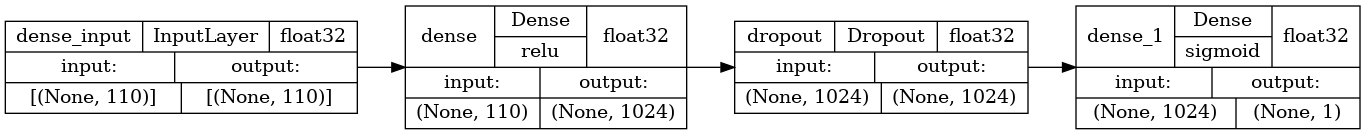

In [42]:
tf.keras.utils.plot_model(sequential_model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True, rankdir="LR")

---

## 2.  Sequential API 

* TensorFlow의 Sequential 모델은 층을 순차적으로 쌓아 모델을 만드는 간단하고 직관적인 방법을 제공합니다. 
* 이 방법은 각 층이 순차적으로 입력과 출력을 연결하는 경우에 적합합니다. 
* Sequential 모델을 생성하고 층을 추가하는 방식은 두 가지가 있습니다: 모델을 정의할 때 층을 리스트로 전달하는 방법과 add 메서드를 사용하는 방법입니다.

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [44]:
# 1. Sequential 모델 인스턴스 생성
add_model = Sequential()

# 2. 층 추가
add_model.add(Dense(1024, activation='relu', input_shape=(110, )))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, activation='sigmoid'))

# 3. 모델 컴파일
add_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics="accuracy")

In [45]:
add_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              113664    
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 114,689
Trainable params: 114,689
Non-trainable params: 0
_________________________________________________________________


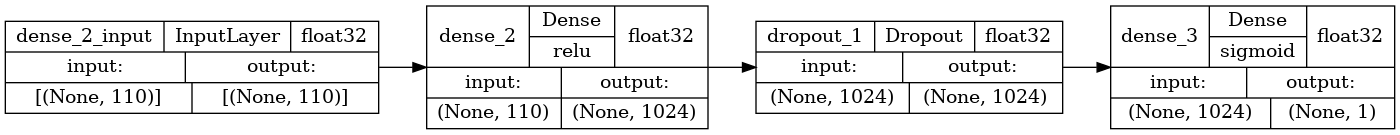

In [46]:
tf.keras.utils.plot_model(add_model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True, rankdir="LR")

---

## Functional API


* 좀 더 복잡한 모델을 구성하는 데 사용됩니다.
* 다중 입력, 다중 출력, 공유 층, 데이터 흐름의 비순차적 경로 등을 다룰 수 있습니다.
* 각 층은 호출 가능하며, 이전 층의 출력을 다음 층의 입력으로 사용합니다.

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [48]:
inputs = Input(shape=(110,))

x = Dense(1024, activation='relu')(inputs)
x = Dropout(0.2)(x)

outputs = Dense(1, activation='sigmoid')(x)

In [49]:
functional_model = Model(inputs=inputs, outputs=outputs)

In [50]:
functional_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                         metrics="accuracy")

In [51]:
functional_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 110)]             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              113664    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 114,689
Trainable params: 114,689
Non-trainable params: 0
_________________________________________________________________


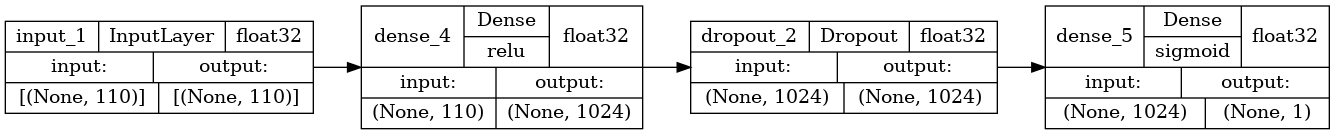

In [52]:
tf.keras.utils.plot_model(functional_model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True, rankdir="LR")

---

## Model Subclassing

* 가장 유연한 방법으로, 사용자 정의 모델을 만들 때 사용됩니다.
* Model 클래스를 상속받아 __init__ 메서드에서 층을 정의하고, call 메서드에서 순전파를 구현합니다.
* 복잡한 모델과 사용자 정의 동작을 쉽게 구현할 수 있습니다.

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [54]:
class MyModel(Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.dense = Dense(1024, activation='relu')
        self.dropout = Dropout(0.2)
        self.logits = Dense(1, activation='sigmoid')

    def call(self, inputs):
        
        x = self.dense(inputs)
        x = self.dropout(x)
        out = self.logits(x)
        return out

subclassing_model = MyModel()

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [56]:
subclassing_model.build(input_shape=(None, 110))

In [57]:
subclassing_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             multiple                  113664    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  1025      
                                                                 
Total params: 114,689
Trainable params: 114,689
Non-trainable params: 0
_________________________________________________________________


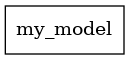

In [58]:
tf.keras.utils.plot_model(subclassing_model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True, show_layer_activations=True, rankdir="LR")

---

# 모델 학습

## 1.  Sequential API 

In [59]:
sequential_history = sequential_model.fit(x=train_x, y=train_y,  validation_data=(valid_x, valid_y), epochs=10)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8926 - val_loss: 0.3325 - val_accuracy: 0.8928
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3297 - accuracy: 0.8929 - val_loss: 0.3311 - val_accuracy: 0.8928
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3280 - accuracy: 0.8929 - val_loss: 0.3290 - val_accuracy: 0.8928
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3268 - accuracy: 0.8929 - val_loss: 0.3297 - val_accuracy: 0.8928
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3246 - accuracy: 0.8929 - val_loss: 0.3300 - val_accuracy: 0.8925
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3219 - accuracy: 0.8928 - val_loss: 0.3308 - val_accuracy: 0.8922
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3184 - accuracy: 0.8930 - val_loss: 0.3341 - val_accuracy:

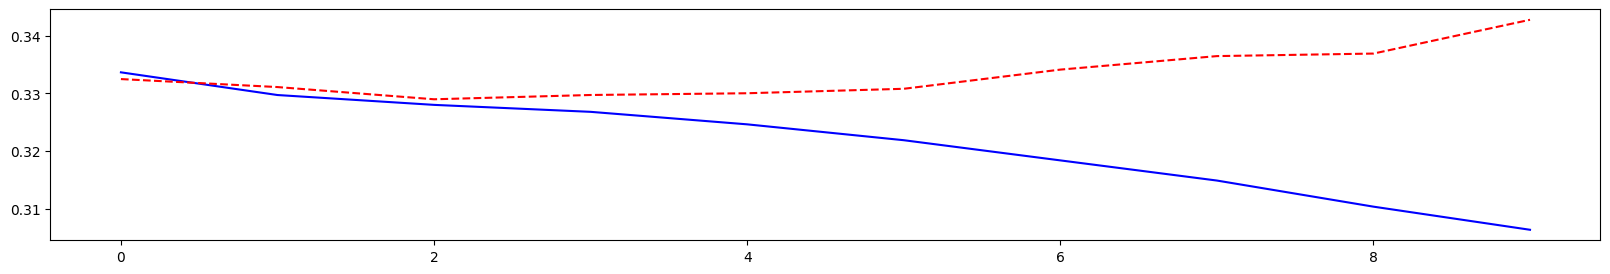

In [60]:
plt.figure(figsize=(20, 3))
plt.plot(sequential_history.history['loss'], 'b-', label='loss')
plt.plot(sequential_history.history['val_loss'], 'r--', label='val_loss')
plt.show()

## 2.  Sequential API 

In [61]:
add_history = add_model.fit(x=train_x, y=train_y,  validation_data=(valid_x, valid_y), epochs=10)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8921 - val_loss: 0.3311 - val_accuracy: 0.8928
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8929 - val_loss: 0.3292 - val_accuracy: 0.8928
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3281 - accuracy: 0.8929 - val_loss: 0.3310 - val_accuracy: 0.8928
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3265 - accuracy: 0.8928 - val_loss: 0.3307 - val_accuracy: 0.8927
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3251 - accuracy: 0.8928 - val_loss: 0.3314 - val_accuracy: 0.8927
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3216 - accuracy: 0.8929 - val_loss: 0.3325 - val_accuracy: 0.8928
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3191 - accuracy: 0.8931 - val_loss: 0.3340 - val_accuracy:

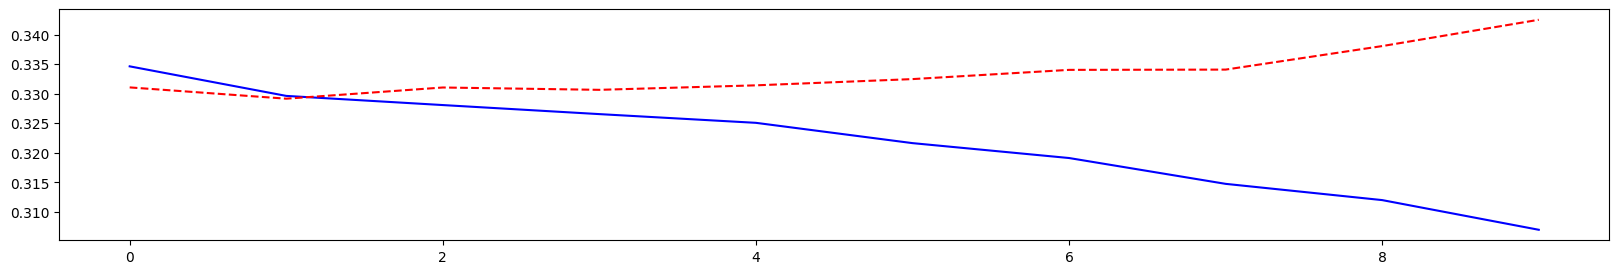

In [62]:
plt.figure(figsize=(20, 3))
plt.plot(add_history.history['loss'], 'b-', label='loss')
plt.plot(add_history.history['val_loss'], 'r--', label='val_loss')
plt.show()

## 3. Functional API


In [63]:
functional_history = functional_model.fit(x=train_x, y=train_y,  validation_data=(valid_x, valid_y), epochs=10)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 0.3337 - accuracy: 0.8926 - val_loss: 0.3296 - val_accuracy: 0.8928
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3293 - accuracy: 0.8929 - val_loss: 0.3337 - val_accuracy: 0.8928
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3281 - accuracy: 0.8928 - val_loss: 0.3297 - val_accuracy: 0.8927
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3263 - accuracy: 0.8929 - val_loss: 0.3315 - val_accuracy: 0.8928
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3249 - accuracy: 0.8928 - val_loss: 0.3300 - val_accuracy: 0.8928
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.8929 - val_loss: 0.3330 - val_accuracy: 0.8930
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3187 - accuracy: 0.8928 - val_loss: 0.3339 - val_accuracy:

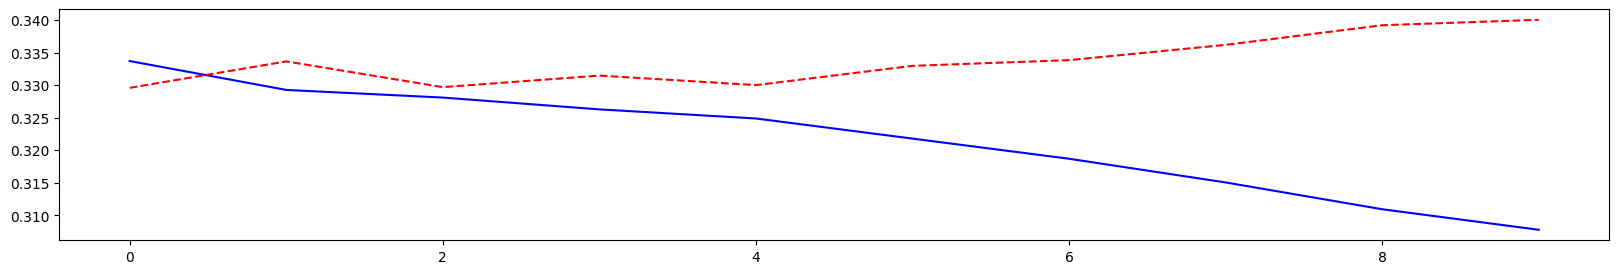

In [64]:
plt.figure(figsize=(20, 3))
plt.plot(functional_history.history['loss'], 'b-', label='loss')
plt.plot(functional_history.history['val_loss'], 'r--', label='val_loss')
plt.show()

## Model Subclassing

In [65]:
from sklearn.utils import gen_batches, shuffle

In [66]:
total_epoch = 10
batch_size = 128

In [67]:
train_batches = list(gen_batches(len(train_x), batch_size))

In [68]:
train_loss = tf.keras.metrics.Mean()
valid_loss = tf.keras.metrics.Mean()

train_acc = tf.keras.metrics.BinaryAccuracy()
valid_acc = tf.keras.metrics.BinaryAccuracy()

train_auc = tf.keras.metrics.AUC()
valid_auc = tf.keras.metrics.AUC()

In [69]:
for epoch in range(total_epoch):
    
    train_loss.reset_state()
    valid_loss.reset_state()
    
    ####################################################################################################
    (shuffle_x, shuffle_y) = shuffle(train_x, train_y)
    
    for batch in train_batches:
        batch_x = shuffle_x[batch]
        batch_y = shuffle_y[batch]
        
        with tf.GradientTape() as tape:
            logits = subclassing_model(batch_x)
            loss = loss_fn(batch_y, logits)

        gradients = tape.gradient(loss, subclassing_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, subclassing_model.trainable_variables))
        
        train_loss.update_state(loss)
        train_acc.update_state(batch_y, logits)
        train_auc.update_state(batch_y, logits)
        
    ####################################################################################################
    logits = subclassing_model.predict(valid_x, verbose=False)
    loss = loss_fn(valid_y, logits)
    valid_loss.update_state(loss)
    valid_acc.update_state(valid_y, logits)
    valid_auc.update_state(valid_y, logits)
    
    msg = "epoch: {:>5d} - loss: {:>.5f} - accuracy: {:>.3%} - auc: {:>.3%} - val_loss: {:>.5f} - val_accuracy: {:>.3%} - val_auc: {:>.3%}"
    print(msg.format(epoch, 
                     train_loss.result().numpy(), train_acc.result().numpy(), train_auc.result().numpy(), 
                     valid_loss.result().numpy(), valid_acc.result().numpy(), valid_auc.result().numpy()))

epoch:     0 - loss: 0.33660 - accuracy: 89.013% - auc: 61.942% - val_loss: 0.32915 - val_accuracy: 89.283% - val_auc: 63.926%
epoch:     1 - loss: 0.32769 - accuracy: 89.150% - auc: 63.341% - val_loss: 0.32904 - val_accuracy: 89.283% - val_auc: 63.855%
epoch:     2 - loss: 0.32587 - accuracy: 89.194% - auc: 64.087% - val_loss: 0.33129 - val_accuracy: 89.283% - val_auc: 63.474%
epoch:     3 - loss: 0.32396 - accuracy: 89.218% - auc: 64.679% - val_loss: 0.32905 - val_accuracy: 89.283% - val_auc: 63.425%
epoch:     4 - loss: 0.32231 - accuracy: 89.231% - auc: 65.176% - val_loss: 0.32988 - val_accuracy: 89.283% - val_auc: 63.408%
epoch:     5 - loss: 0.31908 - accuracy: 89.241% - auc: 65.725% - val_loss: 0.33124 - val_accuracy: 89.278% - val_auc: 63.317%
epoch:     6 - loss: 0.31652 - accuracy: 89.248% - auc: 66.245% - val_loss: 0.33526 - val_accuracy: 89.279% - val_auc: 63.085%
epoch:     7 - loss: 0.31217 - accuracy: 89.256% - auc: 66.864% - val_loss: 0.33642 - val_accuracy: 89.271% - v

---

## Model Subclassing - tf.function

In [70]:
class MyModel(Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.dense = Dense(1024, activation='relu')
        self.dropout = Dropout(0.2)
        self.logits = Dense(1, activation='sigmoid')

    def call(self, inputs, training=False):
        
        x = self.dense(inputs)
        x = self.dropout(x, training=training)
        out = self.logits(x)
        return out

training_model = MyModel()

In [71]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [72]:
@tf.function
def train_step(features, targets):

    with tf.GradientTape() as tape:
        logits = training_model(features, training=True)
        loss = loss_fn(targets, logits)

    gradients = tape.gradient(loss, training_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, training_model.trainable_variables))

    train_loss.update_state(loss)
    train_acc.update_state(targets, logits)
    train_auc.update_state(targets, logits)

In [73]:
@tf.function
def test_step(features, targets):
    
    logits = training_model(features, training=False)
    loss = loss_fn(targets, logits)
    valid_loss.update_state(loss)
    valid_acc.update_state(targets, logits)
    valid_auc.update_state(targets, logits)

In [74]:
for epoch in range(total_epoch):
    
    train_loss.reset_state()
    valid_loss.reset_state()
    
    (shuffle_x, shuffle_y) = shuffle(train_x, train_y)
    
    for batch in train_batches:
        batch_x = shuffle_x[batch]
        batch_y = shuffle_y[batch]
        train_step(batch_x, batch_y)
    
    test_step(valid_x, valid_y)
    
    msg = "epoch: {:>5d} - loss: {:>.5f} - accuracy: {:>.3%} - auc: {:>.3%} - val_loss: {:>.5f} - val_accuracy: {:>.3%} - val_auc: {:>.3%}"
    print(msg.format(epoch, 
                     train_loss.result().numpy(), train_acc.result().numpy(), train_auc.result().numpy(), 
                     valid_loss.result().numpy(), valid_acc.result().numpy(), valid_auc.result().numpy()))

epoch:     0 - loss: 0.33482 - accuracy: 89.274% - auc: 67.604% - val_loss: 0.32869 - val_accuracy: 89.250% - val_auc: 62.823%
epoch:     1 - loss: 0.32819 - accuracy: 89.275% - auc: 67.347% - val_loss: 0.32770 - val_accuracy: 89.253% - val_auc: 62.918%
epoch:     2 - loss: 0.32670 - accuracy: 89.276% - auc: 67.184% - val_loss: 0.32843 - val_accuracy: 89.254% - val_auc: 63.007%
epoch:     3 - loss: 0.32513 - accuracy: 89.277% - auc: 67.095% - val_loss: 0.32873 - val_accuracy: 89.255% - val_auc: 63.094%
epoch:     4 - loss: 0.32324 - accuracy: 89.277% - auc: 67.067% - val_loss: 0.33084 - val_accuracy: 89.257% - val_auc: 63.096%
epoch:     5 - loss: 0.32197 - accuracy: 89.278% - auc: 67.077% - val_loss: 0.32994 - val_accuracy: 89.256% - val_auc: 63.125%
epoch:     6 - loss: 0.31942 - accuracy: 89.279% - auc: 67.144% - val_loss: 0.33373 - val_accuracy: 89.256% - val_auc: 63.115%
epoch:     7 - loss: 0.31672 - accuracy: 89.279% - auc: 67.264% - val_loss: 0.33500 - val_accuracy: 89.253% - v

---

# 추론 수행하기

### sequential_model

In [75]:
sequential_pred = sequential_model.predict(valid_x)

188/188 [==============================] - 0s 780us/step


In [76]:
sequential_pred

array([[0.06745268],
       [0.05601695],
       [0.2131205 ],
       ...,
       [0.13189757],
       [0.07791936],
       [0.13193958]], dtype=float32)

### add_model

In [77]:
add_pred = add_model.predict(valid_x)

188/188 [==============================] - 0s 834us/step


In [78]:
add_pred

array([[0.06797902],
       [0.11277832],
       [0.06791393],
       ...,
       [0.1424541 ],
       [0.11966704],
       [0.16469157]], dtype=float32)

### functional_model

In [79]:
functional_pred = functional_model.predict(valid_x)

188/188 [==============================] - 0s 825us/step


In [80]:
functional_pred

array([[0.0611441 ],
       [0.04700437],
       [0.05835339],
       ...,
       [0.17431109],
       [0.12709913],
       [0.17722735]], dtype=float32)

### subclassing_model

In [81]:
subclassing_pred = subclassing_model.predict(valid_x)

188/188 [==============================] - 0s 814us/step


In [82]:
subclassing_pred

array([[0.02414797],
       [0.0442789 ],
       [0.20212366],
       ...,
       [0.14955086],
       [0.17853826],
       [0.09748074]], dtype=float32)

### training_model

In [83]:
training_pred = training_model(valid_x, training=False)

In [84]:
training_pred

<tf.Tensor: shape=(6000, 1), dtype=float32, numpy=
array([[0.08946144],
       [0.09835502],
       [0.05671812],
       ...,
       [0.19413383],
       [0.14551401],
       [0.21420434]], dtype=float32)>

---

In [85]:
predict_df = pd.DataFrame({
    "y_true" : valid_y.reshape(-1),
    "y_score" : training_pred.numpy().reshape(-1),
    "y_pred" : [1 if i >= 0.5 else 0 for i in training_pred.numpy().reshape(-1)],
})
predict_df

,y_true,y_score,y_pred
0,1,0.089461,0
1,0,0.098355,0
2,0,0.056718,0
3,0,0.128783,0
4,0,0.187892,0
...,...,...,...
5995,0,0.320413,0
5996,1,0.218802,0
5997,0,0.194134,0
5998,0,0.145514,0


In [86]:
accuracy = accuracy_score(predict_df.y_true, predict_df.y_pred)
f1 = f1_score(predict_df.y_true, predict_df.y_pred)
roc_auc = roc_auc_score(predict_df.y_true, predict_df.y_score)

In [87]:
print("acc : {:>.3%}".format(accuracy))
print("f1  : {:>.3%}".format(f1))
print("auc : {:>.3%}".format(roc_auc))

acc : 89.217%
f1  : 0.919%
auc : 63.060%


/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/juing/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


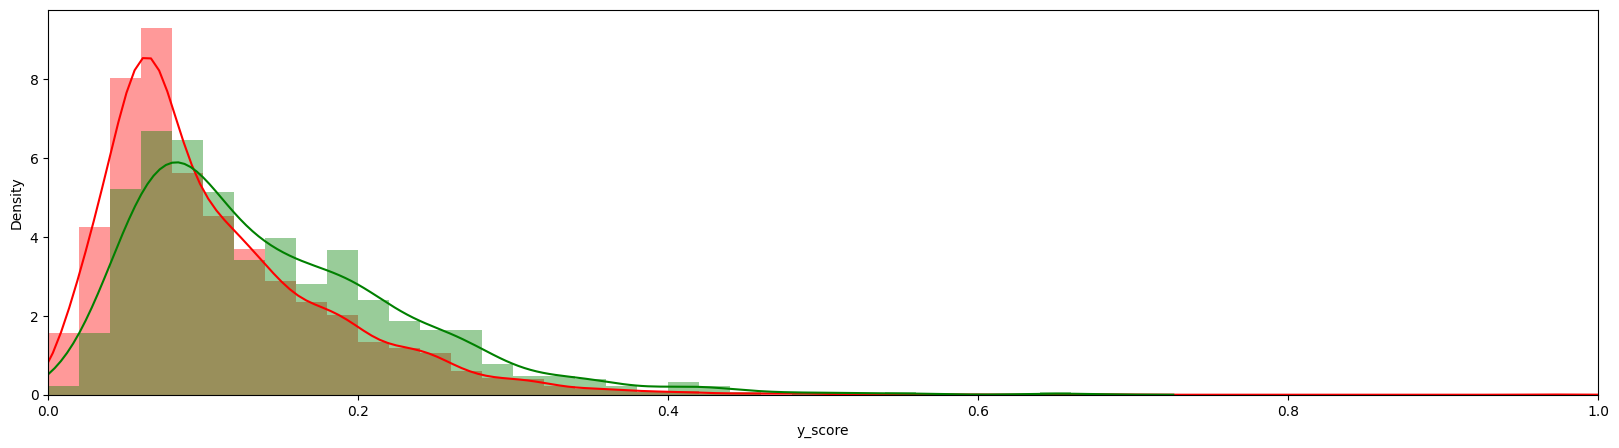

In [88]:
plt.figure(figsize=(20, 5))
sns.distplot(predict_df.loc[((predict_df["y_true"] == 0)), "y_score"], bins=[i/50. for i in range(51)], color="red")
sns.distplot(predict_df.loc[((predict_df["y_true"] == 1)), "y_score"], bins=[i/50. for i in range(51)], color="green")
plt.xlim([0, 1])
plt.show()

# sample_submission




In [89]:
training_pred = training_model(test_x, training=False)

In [90]:
training_pred

<tf.Tensor: shape=(40000, 1), dtype=float32, numpy=
array([[0.27846482],
       [0.08293674],
       [0.05797565],
       ...,
       [0.00877717],
       [0.06501799],
       [0.18831678]], dtype=float32)>

In [91]:
sample_submission["TARGET"] = training_pred.numpy()

In [92]:
sample_submission

,ID,TARGET
0,TEST_00000,0.278465
1,TEST_00001,0.082937
2,TEST_00002,0.057976
3,TEST_00003,0.084598
4,TEST_00004,0.314365
...,...,...
39995,TEST_39995,0.014862
39996,TEST_39996,0.099527
39997,TEST_39997,0.008777
39998,TEST_39998,0.065018


In [93]:
sample_submission

,ID,TARGET
0,TEST_00000,0.278465
1,TEST_00001,0.082937
2,TEST_00002,0.057976
3,TEST_00003,0.084598
4,TEST_00004,0.314365
...,...,...
39995,TEST_39995,0.014862
39996,TEST_39996,0.099527
39997,TEST_39997,0.008777
39998,TEST_39998,0.065018


In [94]:
sample_submission.to_csv('../data/대금연체여부예측/baseline_submit.csv', index=False)

---